# Hypothesis

Going off of the GDP Equation:
    
\begin{align}
GDP = C + G + I + NX,
\end{align}

where C represents personal consumption, G for government expenditures, I for investments, and NX for net exports. Using this equation as a proxy for overall economic health on a national level we can see how certain effects in the real world have on GDP.

### Multiple Linear Regression

In [ ]:
## Importing the libraries

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import genfromtxt

In [3]:
## Importing the dataset

df = pd.read_csv('econometrics_gdp_quarterly.csv', delimiter=',')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, 7].values

irate = X[:, [1]]
sp500 = X[:, [2]]

In [4]:
## Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
## Fitting Multiple Linear Regression to the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Building the optimal model using Backward Elimination

In [6]:
import statsmodels.formula.api as sm
X =  np.append(arr = np.ones((39, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 6]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     643.4
Date:                Tue, 06 Feb 2018   Prob (F-statistic):           1.62e-31
Time:                        03:35:01   Log-Likelihood:                -234.85
No. Observations:                  39   AIC:                             479.7
Df Residuals:                      34   BIC:                             488.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.234e+04    727.717     16.963      0.000    1.09e+04    1.38e+04
x1             1.5246      0.081     18.809      0.000       1.360       1.689
x2          -175.8477     33.042     -5.322      0.000    -242.996    -108.699
x3             0.2335      0.126      1.846      0.074      -0.024       0.491
x4             0.1270      0.153      0.827      0.414      -0.185       0.439
==============================================================================
Omnibus:                        3.145   Durbin-Watson:                   0.698
Prob(Omnibus):                  0.207   Jarque-Bera (JB):                2.649
Skew:                           0.636   Prob(JB):                        0.266
Kurtosis:                       2.887   Cond. No.                     2.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at the T & P values we can see that the first two independent variables, the S&P 500 and the 10-year Treasury maturity rate, are statistically significant. This is shown in their P values being far below 5% thus allowing us to reject the null hypothesis. On the other hand the last two exogenous variables, government expenditures and the trade balance, seem to not be statistically significant due to both having a P-value greater than 5%.

Proceeding forward we remove the trade balance variable to conduct our initial backwards elimination process:

In [7]:
import statsmodels.formula.api as sm
X =  np.append(arr = np.ones((39, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1122.
Date:                Tue, 06 Feb 2018   Prob (F-statistic):           3.73e-33
Time:                        03:35:01   Log-Likelihood:                -238.59
No. Observations:                  39   AIC:                             483.2
Df Residuals:                      36   BIC:                             488.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6746.5702     70.201     96.104      0.000    6604.196    6888.944
x1          6746.5702     70.201     96.104      0.000    6604.196    6888.944
x2             1.6351      0.045     36.397      0.000       1.544       1.726
x3          -191.5365     33.386     -5.737      0.000    -259.247    -123.826
==============================================================================
Omnibus:                        0.314   Durbin-Watson:                   0.661
Prob(Omnibus):                  0.855   Jarque-Bera (JB):                0.456
Skew:                           0.179   Prob(JB):                        0.796
Kurtosis:                       2.609   Cond. No.                     1.41e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.57e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

By taking out net exports 

<IPython.core.display.Javascript object>


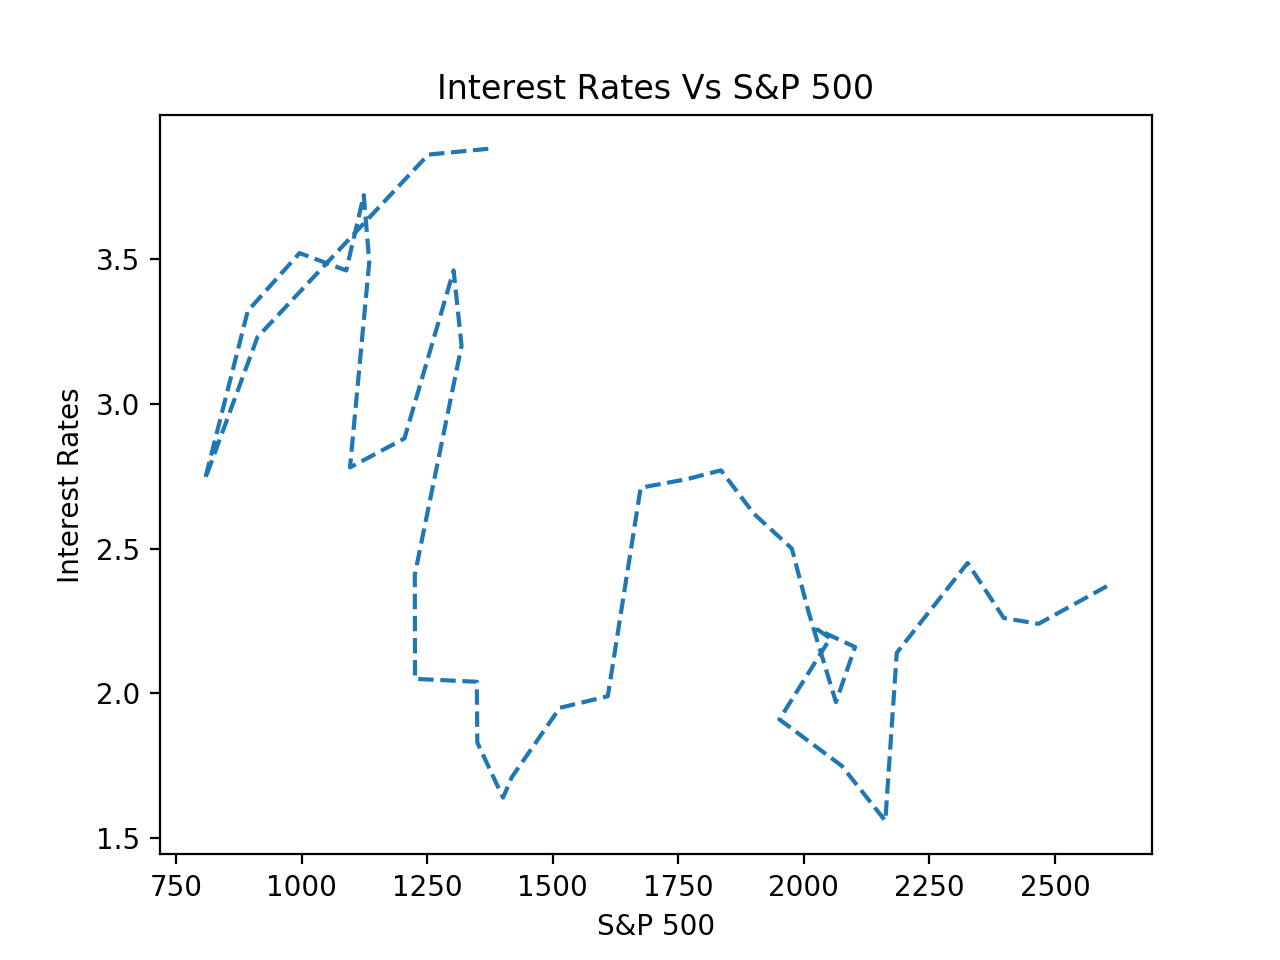

Text(0.5,0,'S&P 500')

In [8]:
from numpy import genfromtxt
data = genfromtxt('econometrics_gdp_quarterly.csv', delimiter=',')
plt.plot(data[:, 1], data[:, 2], linestyle='dashed')
plt.title('Interest Rates Vs S&P 500')
plt.ylabel('Interest Rates')
plt.xlabel('S&P 500')

<IPython.core.display.Javascript object>


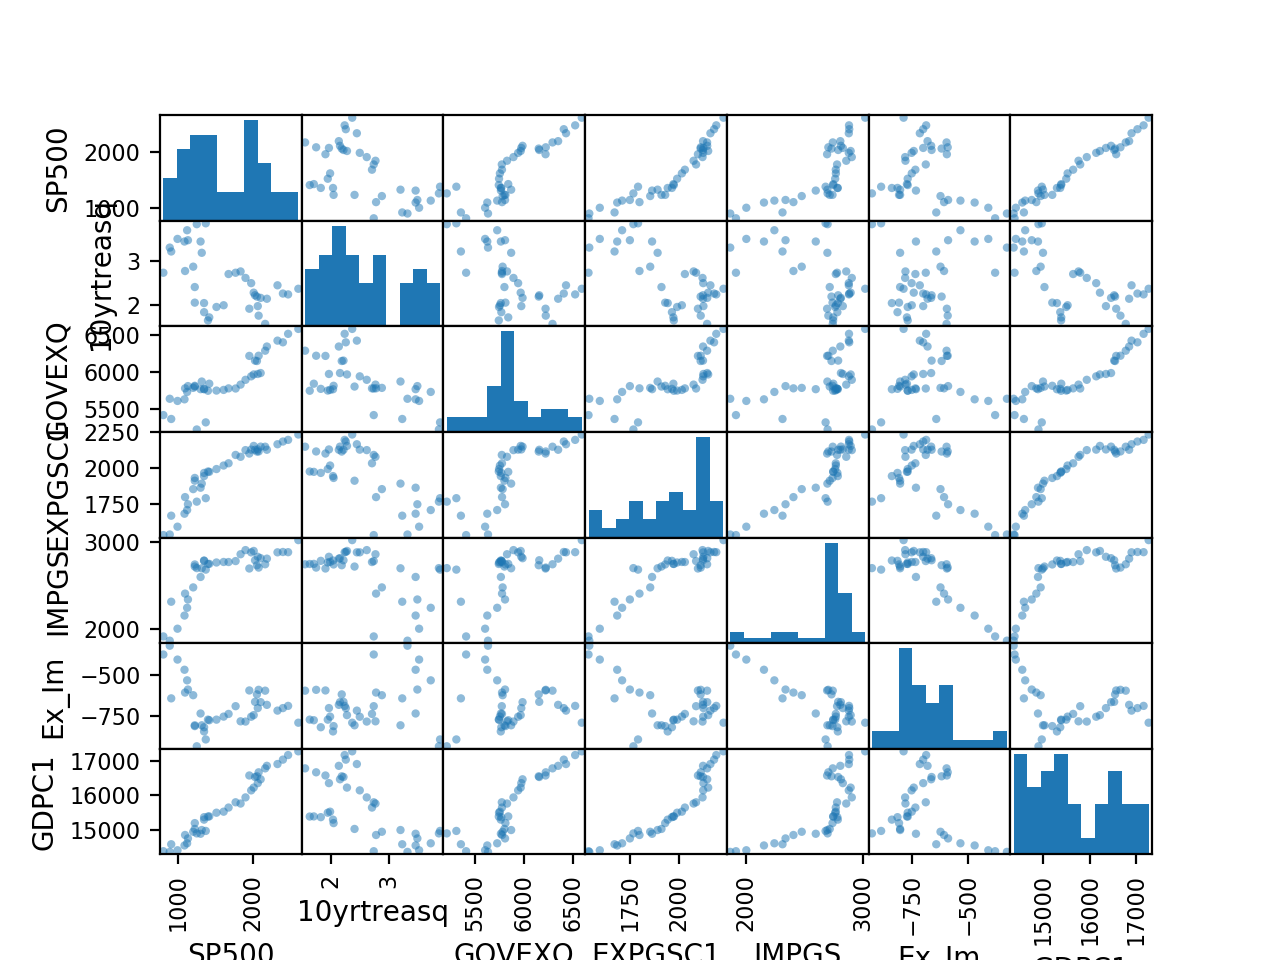

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)

plt.show()

In [10]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')